<h3>Overall Citation Growth</h3>

In [12]:
pred_old_csv = "data/pred/dataset/csv/papers.csv"
pred_new_csv = "data/pred/dataset/csv/papers_collect_after_6months.csv"
norm_old_csv = "data/norm/dataset/csv/papers.csv"
norm_new_csv = "data/norm/dataset/csv/papers_collect_after_6months.csv"
auth_pred_csv = "data/pred/dataset/csv/paper_authors.csv"
auth_reg_csv  = "data/norm/dataset/csv/paper_authors.csv"

pred_old_pkl = "data/pred/dataset/pkl/papers.pkl"
pred_new_pkl = "data/pred/dataset/pkl/papers_collect_after_6months.pkl"
norm_old_pkl = "data/norm/dataset/pkl/papers.pkl"
norm_new_pkl = "data/norm/dataset/pkl/papers_collect_after_6months.pkl"
auth_pred_pkl = "data/pred/dataset/pkl/paper_authors.pkl"
auth_reg_pkl  = "data/norm/dataset/pkl/paper_authors.pkl"

In [13]:
import pandas as pd

def filter_2024(df):
    s = df["publication_date"].astype(str).str.strip()
    year = s.str[:4]
    return df[year == "2024"]


pred_old_csv = filter_2024(pd.read_csv(pred_old_csv_path))
pred_new_csv = filter_2024(pd.read_csv(pred_new_csv_path))
norm_old_csv = filter_2024(pd.read_csv(norm_old_csv_path))
norm_new_csv = filter_2024(pd.read_csv(norm_new_csv_path))

pred_old_pkl = filter_2024(pd.read_pickle(pred_old_pkl_path))
pred_new_pkl = filter_2024(pd.read_pickle(pred_new_pkl_path))
norm_old_pkl = filter_2024(pd.read_pickle(norm_old_pkl_path))
norm_new_pkl = filter_2024(pd.read_pickle(norm_new_pkl_path))


print("pred_old_csv:", pred_old_csv.shape)
print("pred_new_csv:", pred_new_csv.shape)
print("norm_old_csv:", norm_old_csv.shape)
print("norm_new_csv:", norm_new_csv.shape)

print("pred_old_pkl:", pred_old_pkl.shape)
print("pred_new_pkl:", pred_new_pkl.shape)
print("norm_old_pkl:", norm_old_pkl.shape)
print("norm_new_pkl:", norm_new_pkl.shape)


pred_old_csv: (4259, 12)
pred_new_csv: (4573, 11)
norm_old_csv: (2520, 12)
norm_new_csv: (2741, 11)
pred_old_pkl: (4259, 12)
pred_new_pkl: (4573, 11)
norm_old_pkl: (2520, 12)
norm_new_pkl: (2741, 11)


In [14]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np


pred_df = pred_old_pkl.copy()
norm_df = norm_old_pkl.copy()

for df in (pred_df, norm_df):
    df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
    df.dropna(subset=['total_citations'], inplace=True)
    df = df[df['total_citations'] >= 0]

cit_pred = pred_df['total_citations']
cit_norm = norm_df['total_citations']

mean_pred, std_pred = cit_pred.mean(), cit_pred.std()
mean_norm, std_norm = cit_norm.mean(), cit_norm.std()

print(f"Predatory: Mean = {mean_pred:.2f}, SD = {std_pred:.2f}, N = {len(cit_pred)}")
print(f"Normal:    Mean = {mean_norm:.2f}, SD = {std_norm:.2f}, N = {len(cit_norm)}")

# === t test ===
t_stat, p_value = ttest_ind(cit_pred, cit_norm, equal_var=False)

# === Cohen's d ===
pooled_std = np.sqrt((std_pred ** 2 + std_norm ** 2) / 2)
cohen_d = (mean_pred - mean_norm) / pooled_std

print(f"\nStudent’s t-Test:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.5f}")
print(f"\nCohen’s d   = {cohen_d:.3f}")


Predatory: Mean = 6.93, SD = 11.70, N = 4259
Normal:    Mean = 3.31, SD = 10.28, N = 2520

Student’s t-Test:
t-statistic = 13.285
p-value     = 0.00000

Cohen’s d   = 0.328


In [15]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np


pred_df = pred_new_pkl.copy()
norm_df = norm_new_pkl.copy()

for df in (pred_df, norm_df):
    df['total_citations'] = pd.to_numeric(df['total_citations'], errors='coerce')
    df.dropna(subset=['total_citations'], inplace=True)
    df = df[df['total_citations'] >= 0]

cit_pred = pred_df['total_citations']
cit_norm = norm_df['total_citations']

mean_pred, std_pred = cit_pred.mean(), cit_pred.std()
mean_norm, std_norm = cit_norm.mean(), cit_norm.std()

print(f"Predatory: Mean = {mean_pred:.2f}, SD = {std_pred:.2f}, N = {len(cit_pred)}")
print(f"Normal:    Mean = {mean_norm:.2f}, SD = {std_norm:.2f}, N = {len(cit_norm)}")

# === t test ===
t_stat, p_value = ttest_ind(cit_pred, cit_norm, equal_var=False)

# === Cohen's d ===
pooled_std = np.sqrt((std_pred ** 2 + std_norm ** 2) / 2)
cohen_d = (mean_pred - mean_norm) / pooled_std

print(f"\nStudent’s t-Test:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.5f}")
print(f"\nCohen’s d   = {cohen_d:.3f}")


Predatory: Mean = 22.08, SD = 32.91, N = 4573
Normal:    Mean = 7.84, SD = 33.40, N = 2741

Student’s t-Test:
t-statistic = 17.757
p-value     = 0.00000

Cohen’s d   = 0.430


2024 citation growth comparison

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

pred_old_pkl_path = "data/pred/dataset/pkl/papers.pkl"
pred_new_pkl_path = "data/pred/dataset/pkl/papers_collect_after_6months.pkl"
norm_old_pkl_path = "data/norm/dataset/pkl/papers.pkl"
norm_new_pkl_path = "data/norm/dataset/pkl/papers_collect_after_6months.pkl"



def filter_2024(df):
    s = df["publication_date"].astype(str).str.strip()
    year = s.str[:4]
    return df[year == "2024"].copy()


def prepare_pair(old_df, new_df, id_col="paper_id", cit_col="total_citations"):
  
    old = old_df[[id_col, cit_col]].copy()
    new = new_df[[id_col, cit_col]].copy()

    old[cit_col] = pd.to_numeric(old[cit_col], errors="coerce")
    new[cit_col] = pd.to_numeric(new[cit_col], errors="coerce")

    merged = old.merge(new, on=id_col, suffixes=("_old", "_new"))

    merged.dropna(subset=[f"{cit_col}_old", f"{cit_col}_new"], inplace=True)

    merged["citation_growth"] = (
        merged[f"{cit_col}_new"] - merged[f"{cit_col}_old"]
    )

    # merged = merged[merged["citation_growth"] >= 0]

    return merged



pred_old_all = pd.read_pickle(pred_old_pkl_path)
pred_new_all = pd.read_pickle(pred_new_pkl_path)
norm_old_all = pd.read_pickle(norm_old_pkl_path)
norm_new_all = pd.read_pickle(norm_new_pkl_path)

pred_old_2024 = filter_2024(pred_old_all)
pred_new_2024 = filter_2024(pred_new_all)
norm_old_2024 = filter_2024(norm_old_all)
norm_new_2024 = filter_2024(norm_new_all)

print("Pred old 2024:", pred_old_2024.shape)
print("Pred new 2024:", pred_new_2024.shape)
print("Norm old 2024:", norm_old_2024.shape)
print("Norm new 2024:", norm_new_2024.shape)



# predatory
merged_pred = prepare_pair(pred_old_2024, pred_new_2024,
                           id_col="id", cit_col="total_citations")

# normal
merged_norm = prepare_pair(norm_old_2024, norm_new_2024,
                           id_col="id", cit_col="total_citations")

print("Predatory:", merged_pred.shape)
print("Normal:  ", merged_norm.shape)



pred_growth = merged_pred["citation_growth"]
norm_growth = merged_norm["citation_growth"]

mean_pred = pred_growth.mean()
std_pred  = pred_growth.std()
n_pred    = pred_growth.shape[0]

mean_norm = norm_growth.mean()
std_norm  = norm_growth.std()
n_norm    = norm_growth.shape[0]

print("\n=== Citation growth（new - old）===")
print(f"Predatory: Mean = {mean_pred:.2f}, SD = {std_pred:.2f}, N = {n_pred}")
print(f"Normal:    Mean = {mean_norm:.2f}, SD = {std_norm:.2f}, N = {n_norm}")

t_stat, p_value = ttest_ind(pred_growth, norm_growth, equal_var=False)

# Cohen's d
pooled_std = np.sqrt((std_pred**2 + std_norm**2) / 2)
cohen_d = (mean_pred - mean_norm) / pooled_std

print("\n=== Student’s t-Test on growth ===")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.5f}")

print("\n=== Effect size ===")
print(f"Cohen’s d   = {cohen_d:.3f}")


Pred old 2024: (4259, 12)
Pred new 2024: (4573, 11)
Norm old 2024: (2520, 12)
Norm new 2024: (2741, 11)
Predatory: (2247, 4)
Normal:   (805, 4)

=== Citation growth（new - old）===
Predatory: Mean = 15.49, SD = 34.72, N = 2247
Normal:    Mean = 3.27, SD = 19.93, N = 805

=== Student’s t-Test on growth ===
t-statistic = 12.041
p-value     = 0.00000

=== Effect size ===
Cohen’s d   = 0.432


<h2>Using data from Crossref - age-matched citation accrual over same windows </h2>

Clean crossref meta data

In [17]:
import pandas as pd

path = "data/norm/metadata/norm_crossref_meta.csv"
df = pd.read_csv(path, parse_dates=["publication_date"])

dups = df[df.duplicated(subset="id", keep=False)]
print("repeated ID:")
print(dups.sort_values("id"))

df_clean = df.drop_duplicates(subset="id", keep="first")

out_path = "data/pred/metadata/pred_crossref_meta.csv"
df_clean.to_csv(out_path, index=False)


repeated ID:
Empty DataFrame
Columns: [id, title, authors, publication_date, journal, publisher, issn, reference_count, is_referenced_by_count, subject, reference, source]
Index: []


Match Age

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as ss

datasets = {
    "Normal": {
        "t1":  "data/norm/dataset/csv/papers.csv",
        "t2":  "data/norm/dataset/csv/papers_collect_after_6months.csv",
        "meta":"data/norm/metadata/norm_crossref_meta.csv"
    },
    "Predatory": {
        "t1":  "data/pred/dataset/csv/papers.csv",
        "t2":  "data/pred/dataset/csv/papers_collect_after_6months.csv",
        "meta":"data/pred/metadata/pred_crossref_meta.csv"
    }
}

for label, paths in datasets.items():
    print(f"\n===== {label} =====")

    if label == "Predatory":
        t1 = pd.to_datetime("2024-10-21")
    else:  # Normal
        t1 = pd.to_datetime("2025-01-22")
    lower = t1 - pd.Timedelta(days=365*20)

    df1 = pd.read_csv(paths["t1"],  usecols=["id", "total_citations"])\
            .rename(columns={"total_citations": "C_t1"})
    df2 = pd.read_csv(paths["t2"],  usecols=["id", "total_citations"])\
            .rename(columns={"total_citations": "C_t2"})
    
    meta = pd.read_csv(paths["meta"], usecols=["id", "publication_date"])
    meta["publication_date"] = pd.to_datetime(
        meta["publication_date"], format="%Y-%m-%d", errors="coerce"
    ).dropna()
   
    lower = t1 - pd.Timedelta(days=365*20)
    meta = meta[(meta["publication_date"] <= t1) & (meta["publication_date"] >= lower)]
    
    df = (meta.merge(df1, on="id")
              .merge(df2, on="id"))
    df = df[df["C_t2"] >= df["C_t1"]]
    
    df["age_t1"]   = (t1 - df["publication_date"]).dt.days / 365
    df["delta_C"]  = df["C_t2"] - df["C_t1"]
    df["C_t1_adj"] = df["C_t1"].replace(0, 1)
    df["growth_rate"] = df["delta_C"] / df["C_t1_adj"] * 100
    df = df[df["growth_rate"] >= 0]
    
    bins   = [0, 0.5, 1, 2, 3, np.inf]
    labels = ["0–6m", "6m–1y", "1–2y", "2–3y", ">3y"]

    df["age_bin"] = pd.cut(df["age_t1"], bins=bins, labels=labels)

    
    summary = []
    for age_bin, sub in df.groupby("age_bin", observed=True):
        total = len(sub)
        n_zero = (sub["growth_rate"] == 0).sum()
        n_pos  = (sub["growth_rate"] > 0).sum()
        gr     = sub["growth_rate"]
        median = np.median(gr)
        iqr    = np.percentile(gr, [25, 75])
        summary.append({
            "age_bin":        age_bin,
            "total_papers":   total,
            "n_zero (%)":     f"{n_zero} ({n_zero/total:.1%})",
            "n_positive (%)": f"{n_pos} ({n_pos/total:.1%})",
            "median_growth%": f"{median:.1f}",
            "IQR_%":          f"{iqr[0]:.1f}–{iqr[1]:.1f}"
        })
    summary_df = pd.DataFrame(summary)
    
    print(summary_df.to_string(index=False))



===== Normal =====
age_bin  total_papers  n_zero (%) n_positive (%) median_growth%        IQR_%
   0–6m           891 190 (21.3%)    701 (78.7%)          300.0  95.8–1141.7
  6m–1y           570 106 (18.6%)    464 (81.4%)          300.0 100.0–1100.0
   1–2y           882 177 (20.1%)    705 (79.9%)          200.0   47.5–800.0
   2–3y           607 100 (16.5%)    507 (83.5%)          200.0   50.0–729.2
    >3y          1189 212 (17.8%)    977 (82.2%)          300.0  75.0–1200.0

===== Predatory =====
age_bin  total_papers  n_zero (%) n_positive (%) median_growth%        IQR_%
   0–6m           521  99 (19.0%)    422 (81.0%)          500.0  94.1–2000.0
  6m–1y           628 102 (16.2%)    526 (83.8%)          500.0 100.0–1900.0
   1–2y           958 167 (17.4%)    791 (82.6%)          500.0 100.0–1900.0
   2–3y           640 105 (16.4%)    535 (83.6%)          481.7 100.0–1725.0
    >3y          1007 182 (18.1%)    825 (81.9%)          500.0 100.0–1900.0


Statistical Tests

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as ss


frames = []
for label, paths in datasets.items():
    if label == "Predatory":
        t1 = pd.to_datetime("2024-10-21") # the date finished predatory set collection
    else:  # Normal
        t1 = pd.to_datetime("2025-01-22") # date finished normal set collection
    lower = t1 - pd.Timedelta(days=365*20)
    
    df1 = pd.read_csv(paths["t1"],  usecols=["id", "total_citations"]).rename(columns={"total_citations":"C_t1"})
    df2 = pd.read_csv(paths["t2"],  usecols=["id", "total_citations"]).rename(columns={"total_citations":"C_t2"})

    meta = pd.read_csv(paths["meta"], usecols=["id","publication_date"])
    meta["publication_date"] = pd.to_datetime(meta["publication_date"], format="%Y-%m-%d", errors="coerce")
    meta = meta.dropna(subset=["publication_date"])
    meta = meta[(meta["publication_date"]<=t1)&(meta["publication_date"]>=lower)]
   
    df = meta.merge(df1, on="id").merge(df2, on="id")
    df = df[df["C_t2"]>=df["C_t1"]]

    df["age_t1"] = (t1 - df["publication_date"]).dt.days/365
    df["delta_C"] = df["C_t2"] - df["C_t1"]
    df["C_t1_adj"] = df["C_t1"].replace(0, 1)
    df["growth_rate"] = df["delta_C"]/df["C_t1_adj"]*100
    df = df[df["growth_rate"]>=0]
  
    df["age_bin"] = pd.cut(df["age_t1"], bins=bins, labels=labels)
    df["dataset"] = label
    frames.append(df)

df_all = pd.concat(frames, ignore_index=True)

# Mann–Whitney U 
print("Age bin  |   U statistic   |     p-value")
print("----------------------------------------")
for age_bin, sub in df_all.groupby("age_bin", observed=True):
    pred = sub.loc[sub["dataset"]=="Predatory", "growth_rate"]
    norm = sub.loc[sub["dataset"]=="Normal",    "growth_rate"]
    u_stat, pval = ss.mannwhitneyu(pred[pred>0], norm[norm>0], alternative="two-sided")
    print(f"{age_bin:>6}   | {u_stat:13.0f} | {pval: .3e}")


Age bin  |   U statistic   |     p-value
----------------------------------------
  0–6m   |        163562 |  2.908e-03
 6m–1y   |        137808 |  4.373e-04
  1–2y   |        341143 |  7.621e-14
  2–3y   |        171729 |  1.003e-13
   >3y   |        449220 |  2.642e-05


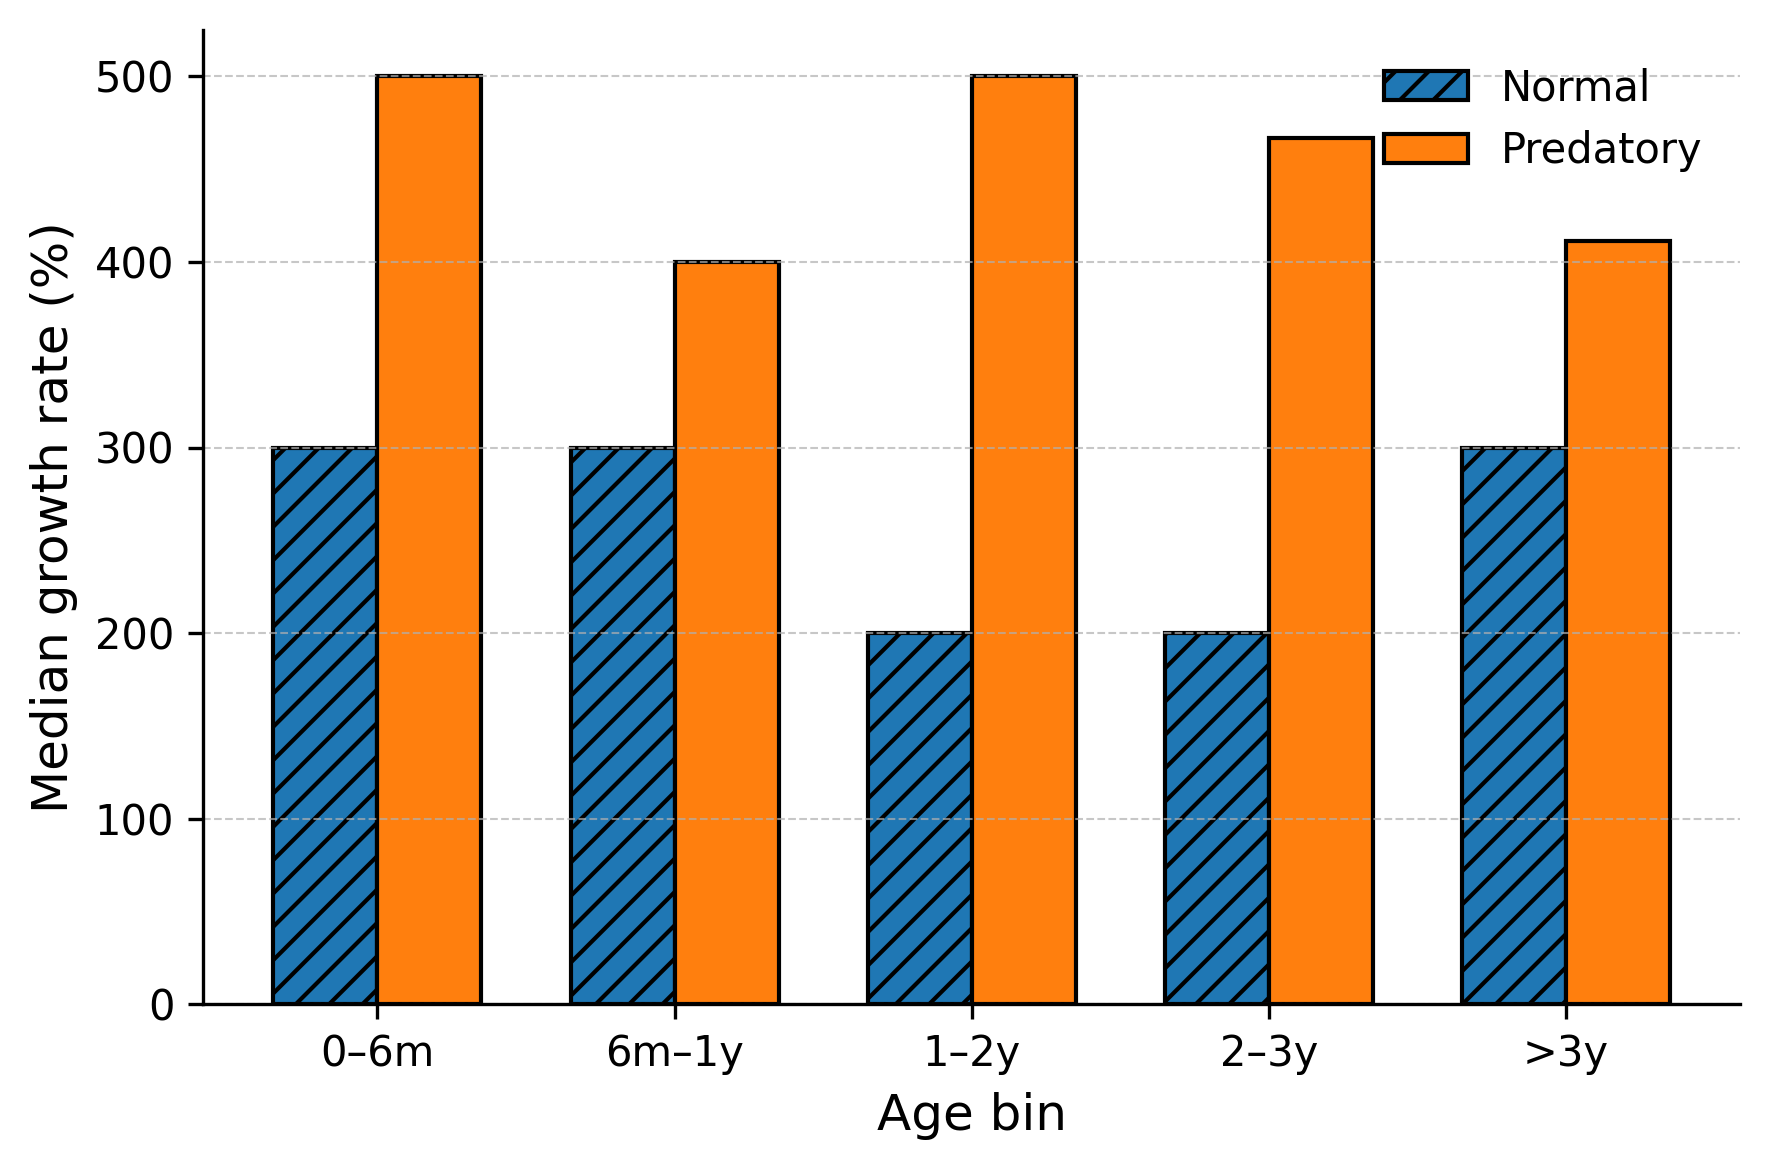

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

age_bins = ["0–6m", "6m–1y", "1–2y", "2–3y", ">3y"]
med_normal = [300.0, 300.0, 200.0, 200.0, 300.0]
med_pred =   [500.0, 400.0, 500.0, 466.7, 411.5]

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
x = np.arange(len(age_bins))
width = 0.35

bars_normal = ax.bar(
    x - width/2, med_normal, width,
    color='tab:blue', edgecolor='black', hatch='///', label='Normal'
)
bars_pred = ax.bar(
    x + width/2, med_pred, width,
    color='tab:orange', edgecolor='black', label='Predatory'
)

ax.set_xticks(x)
ax.set_xticklabels(age_bins, fontsize=10)
ax.set_xlabel('Age bin', fontsize=12)
ax.set_ylabel('Median growth rate (%)', fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()
